In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
frequency = 564e3
period = 1/frequency

In [22]:
Class1 = [172, 174, 175, 176, 180]
weights = [534947, 542216, 541453, 540015, 540729]

print(Class1)
nr_cell_pulses = 176
nr_q = 256

dS = np.zeros((len(Class1),nr_cell_pulses,nr_q))
q = np.load(f'/gpfs/exfel/exp/SPB/202202/p003046/scratch/data/pa_filtered_runs/qs_runr0{180}.npy')

for i, run in enumerate(Class1): #Class1):
    f = np.load(f'/gpfs/exfel/exp/SPB/202202/p003046/scratch/data/pa_filtered_runs/dS_runr0{run}.npy')
    dS[i] = f[:176]
    

[172, 174, 175, 176, 180]


In [67]:
avg_dS = (np.sum(np.multiply(dS.T,weights),axis=2)/np.sum(weights)).T

In [60]:
((np.multiply(dS.T,weights)).T)[0] == dS[0]*weights[0]

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True,  True, False],
       ...,
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True,  True, False]])

In [49]:
avg_dS.shape

(176, 256)

(0.0, 21.3173458380012)

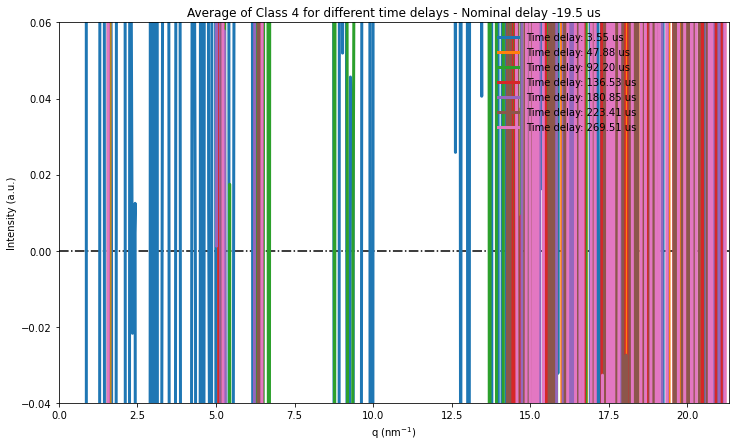

In [66]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
plt.title('Average of Class 4 for different time delays - Nominal delay -19.5 us') 

avg_dS = dS[0]*weights[0]#np.sum(dS,axis=0)/dS.shape[0]
#print(avg_dS.shape)

ax.plot(q, np.sum(avg_dS[1:26,:],axis = 0).T/25,linewidth=3.0, label= f'Time delay: {(period*1e6*13) -19.5:.2f} us')
ax.plot(q, np.sum(avg_dS[26:50,:],axis = 0).T/24,linewidth=3.0, label= f'Time delay: {(period*1e6*38) -19.5:.2f} us')
ax.plot(q, np.sum(avg_dS[50:75,:],axis = 0).T/25,linewidth=3.0, label= f'Time delay: {(period*1e6*63) -19.5:.2f} us')
ax.plot(q, np.sum(avg_dS[75:100,:],axis = 0).T/25,linewidth=3.0, label= f'Time delay: {(period*1e6*88) -19.5:.2f} us')
ax.plot(q, np.sum(avg_dS[100:125,:],axis = 0).T/25,linewidth=3.0, label= f'Time delay: {(period*1e6*113) -19.5:.2f} us')
ax.plot(q, np.sum(avg_dS[125:150,:],axis = 0).T/25,linewidth=3.0, label= f'Time delay: {(period*1e6*137) -19.5:.2f} us')
ax.plot(q, np.sum(avg_dS[150:175,:],axis = 0).T/25,linewidth=3.0, label= f'Time delay: {(period*1e6*163) -19.5:.2f} us')

ax.hlines(0, xmin = q[0], xmax = q[-1], color='k', linestyle='-.')
ax.legend(loc=(0.65,0.7), frameon = False)
ax.set_ylabel('Intensity (a.u.)')

ax.set_xlabel('q (nm$^{-1}$)')
ax.set_ylim([-.04,.06])
ax.set_xlim([0,q[-1]])

In [7]:
q = [ 0.    ,  0.08359743,  0.16719487,  0.2507923 ,  0.33438974,  0.41798717,
  0.50158461,  0.58518204,  0.66877948,  0.75237691,  0.83597435,  0.91957178,
  1.00316922,  1.08676665,  1.17036409,  1.25396152,  1.33755895,  1.42115639,
  1.50475382,  1.58835126,  1.67194869,  1.75554613,  1.83914356,  1.922741,
  2.00633843,  2.08993587,  2.1735333 ,  2.25713074,  2.34072817,  2.42432561,
  2.50792304,  2.59152047,  2.67511791,  2.75871534,  2.84231278,  2.92591021,
  3.00950765,  3.09310508,  3.17670252,  3.26029995,  3.34389739,  3.42749482,
  3.51109226,  3.59468969,  3.67828712,  3.76188456,  3.84548199,  3.92907943,
  4.01267686,  4.0962743 ,  4.17987173,  4.26346917,  4.3470666 ,  4.43066404,
  4.51426147,  4.59785891,  4.68145634,  4.76505378,  4.84865121,  4.93224864,
  5.01584608,  5.09944351,  5.18304095,  5.26663838,  5.35023582,  5.43383325,
  5.51743069,  5.60102812,  5.68462556,  5.76822299,  5.85182043,  5.93541786,
  6.0190153 ,  6.10261273,  6.18621016,  6.2698076 ,  6.35340503,  6.43700247,
  6.5205999 ,  6.60419734,  6.68779477,  6.77139221,  6.85498964,  6.93858708,
  7.02218451,  7.10578195,  7.18937938,  7.27297682,  7.35657425,  7.44017168,
  7.52376912,  7.60736655,  7.69096399,  7.77456142,  7.85815886,  7.94175629,
  8.02535373,  8.10895116,  8.1925486 ,  8.27614603,  8.35974347,  8.4433409,
  8.52693834,  8.61053577,  8.6941332 ,  8.77773064,  8.86132807,  8.94492551,
  9.02852294,  9.11212038,  9.19571781,  9.27931525,  9.36291268,  9.44651012,
  9.53010755,  9.61370499,  9.69730242,  9.78089986,  9.86449729,  9.94809472,
 10.03169216, 10.11528959, 10.19888703, 10.28248446, 10.3660819 , 10.44967933,
 10.53327677, 10.6168742 , 10.70047164, 10.78406907, 10.86766651, 10.95126394,
 11.03486137, 11.11845881, 11.20205624, 11.28565368, 11.36925111, 11.45284855,
 11.53644598, 11.62004342, 11.70364085, 11.78723829, 11.87083572, 11.95443316,
 12.03803059, 12.12162803, 12.20522546, 12.28882289, 12.37242033, 12.45601776,
 12.5396152 , 12.62321263, 12.70681007, 12.7904075 , 12.87400494, 12.95760237,
 13.04119981, 13.12479724, 13.20839468, 13.29199211, 13.37558955, 13.45918698,
 13.54278441, 13.62638185, 13.70997928, 13.79357672, 13.87717415, 13.96077159,
 14.04436902, 14.12796646, 14.21156389, 14.29516133, 14.37875876, 14.4623562,
 14.54595363, 14.62955107, 14.7131485 , 14.79674593, 14.88034337, 14.9639408,
 15.04753824, 15.13113567, 15.21473311, 15.29833054, 15.38192798, 15.46552541,
 15.54912285, 15.63272028, 15.71631772, 15.79991515, 15.88351259, 15.96711002,
 16.05070745, 16.13430489, 16.21790232, 16.30149976, 16.38509719, 16.46869463,
 16.55229206, 16.6358895 , 16.71948693, 16.80308437, 16.8866818 , 16.97027924,
 17.05387667, 17.13747411, 17.22107154, 17.30466897, 17.38826641, 17.47186384,
 17.55546128, 17.63905871, 17.72265615, 17.80625358, 17.88985102, 17.97344845,
 18.05704589, 18.14064332, 18.22424076, 18.30783819, 18.39143562, 18.47503306,
 18.55863049, 18.64222793, 18.72582536, 18.8094228 , 18.89302023, 18.97661767,
 19.0602151 , 19.14381254, 19.22740997, 19.31100741, 19.39460484, 19.47820228,
 19.56179971, 19.64539714, 19.72899458, 19.81259201, 19.89618945, 19.97978688,
 20.06338432, 20.14698175, 20.23057919, 20.31417662, 20.39777406, 20.48137149,
 20.56496893, 20.64856636, 20.7321638 , 20.81576123, 20.89935866, 20.9829561,
 21.06655353, 21.15015097, 21.2337484 , 21.31734584]